In [1]:
%matplotlib notebook
import os
import numpy as np
import joblib
import pandas as pd
from typing import List, Dict

import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error

# REV analysis

After running REV.py script. you will have two dictionaries in the specified output directory.
You can then use those file to plot correlation function curves which can be then interpreted and analyzed to determine REV size for a 3D volume.

In [6]:
# output_dir = r"D:\Hamed\SliceGAN-V1.1\training-runs" # replace this path with your output folder
# # print(output_dir)
# s2_3d_dict = joblib.load(os.path.join(output_dir, 's2_3d_dict.pkl'))
# f2_3d_dict = joblib.load(os.path.join(output_dir, 'f2_3d_dict.pkl'))

In [52]:
# f2_3d_dict.keys(), s2_3d_dict.keys()

(dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_350', 'original']),
 dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_350', 'original']))

In [7]:
# plt.figure()
# plt.plot(s2_3d_dict['original'], 'k', label = 'Original')
# plt.plot(s2_3d_dict['sub_64']['s2']['mean'], 'g', label = '64')
# plt.plot(s2_3d_dict['sub_128']['s2']['mean'], 'r', label = '128')
# plt.plot(s2_3d_dict['sub_256']['s2']['mean'], 'orange', label = '256')
# plt.plot(s2_3d_dict['sub_350']['s2']['mean'], 'c', label = '350')

# plt.xlabel('r (px)', fontsize = 'x-large')
# plt.ylabel('Two-point correlation ($S_2$)', fontsize = 'x-large')

# plt.legend(ncol =2)
# plt.tight_layout()
# plt.show()


# plt.figure(figsize= (8, 6))
# plt.plot(f2_3d_dict['original'], 'k', label = 'Original')
# plt.plot(f2_3d_dict['sub_64']['f2']['mean'], 'g', label = '64')
# plt.plot(f2_3d_dict['sub_128']['f2']['mean'], 'r', label = '128')
# plt.plot(f2_3d_dict['sub_256']['f2']['mean'], 'orange', label = '256')
# plt.plot(f2_3d_dict['sub_350']['f2']['mean'], 'c', label = '350')


# plt.xlabel('r (px)', fontsize = 'x-large')
# plt.ylabel('Scaled autocovariance ($F_2$)', fontsize = 'x-large')
# plt.grid(alpha = 0.5)
# plt.tick_params(labelsize = 'x-large')
# plt.legend(ncol =3, fontsize = 'large')
# plt.ylim(-.05, 0.05)
# plt.show()

# RES analysis

In [2]:
output_dir = r"D:\Hamed\SliceGAN_2Dto3D\TrainingImages" # replace this path with your output folder
# print(output_dir)
## LT2 is the image with pixel size= 50nm 
lt2_s2_dict = joblib.load(os.path.join(output_dir, 'lt2_s2_dict.pkl'))
lt2_f2_dict = joblib.load(os.path.join(output_dir, 'lt2_f2_dict.pkl'))

## LT1 is the image with pixel size= 100nm 
lt1_s2_dict = joblib.load(os.path.join(output_dir, 'lt1_s2_dict.pkl'))
lt1_f2_dict = joblib.load(os.path.join(output_dir, 'lt1_f2_dict.pkl'))

In [3]:
lt2_f2_dict.keys(), lt1_f2_dict.keys()

(dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_512', 'sub_1024', 'sub_2048']),
 dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_512', 'sub_1024', 'sub_2048', 'sub_2500']))

<IPython.core.display.Javascript object>


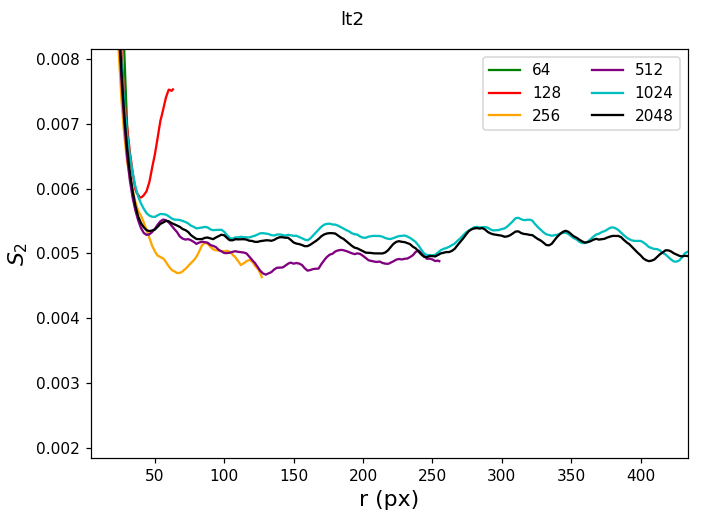

<IPython.core.display.Javascript object>


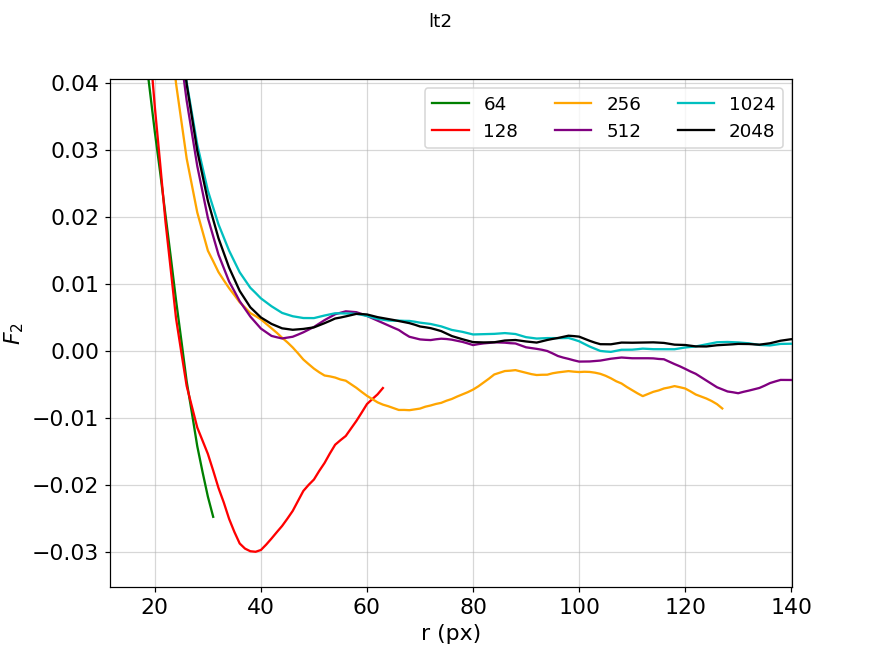

In [5]:
plt.figure()
plt.plot(lt2_s2_dict['sub_64']['s2']['mean'], 'g', label = '64')
plt.plot(lt2_s2_dict['sub_128']['s2']['mean'], 'r', label = '128')
plt.plot(lt2_s2_dict['sub_256']['s2']['mean'], 'orange', label = '256')
plt.plot(lt2_s2_dict['sub_512']['s2']['mean'], 'purple', label = '512')
plt.plot(lt2_s2_dict['sub_1024']['s2']['mean'], 'c', label = '1024')
plt.plot(lt2_s2_dict['sub_2048']['s2']['mean'], 'k', label = '2048')

plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('$S_2$', fontsize = 'x-large')

plt.legend(ncol =2)
plt.suptitle('lt2')
plt.tight_layout()
plt.show()


plt.figure(figsize= (8, 6))
plt.plot(lt2_f2_dict['sub_64']['f2']['mean'], 'g', label = '64')
plt.plot(lt2_f2_dict['sub_128']['f2']['mean'], 'r', label = '128')
plt.plot(lt2_f2_dict['sub_256']['f2']['mean'], 'orange', label = '256')
plt.plot(lt2_f2_dict['sub_512']['f2']['mean'], 'purple', label = '512')
plt.plot(lt2_f2_dict['sub_1024']['f2']['mean'], 'c', label = '1024')
plt.plot(lt2_f2_dict['sub_2048']['f2']['mean'], 'k', label = '2048')


plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('$F_2$', fontsize = 'x-large')

# plt.ylim(-0.02, 0.02)
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'x-large')
plt.legend(ncol =3, fontsize = 'large')
plt.suptitle('lt2')
plt.show()

<IPython.core.display.Javascript object>


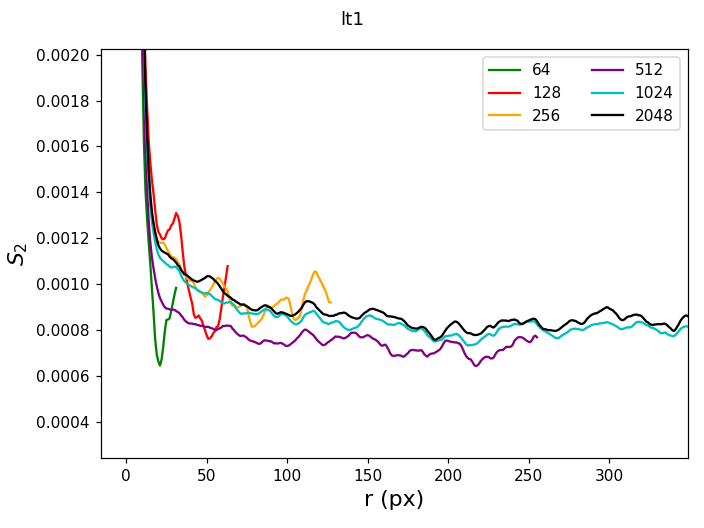

<IPython.core.display.Javascript object>


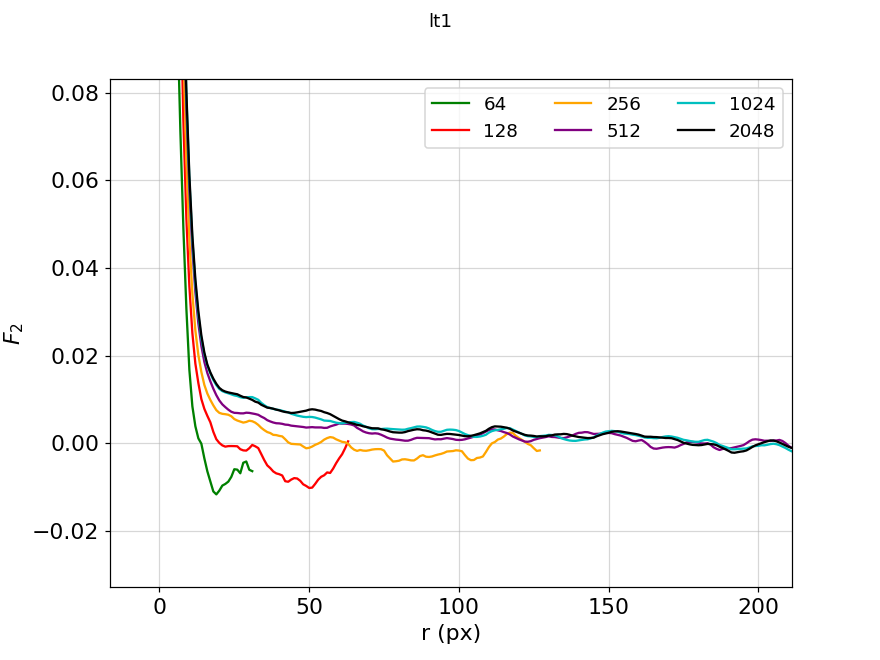

In [6]:
plt.figure()
plt.plot(lt1_s2_dict['sub_64']['s2']['mean'], 'g', label = '64')
plt.plot(lt1_s2_dict['sub_128']['s2']['mean'], 'r', label = '128')
plt.plot(lt1_s2_dict['sub_256']['s2']['mean'], 'orange', label = '256')
plt.plot(lt1_s2_dict['sub_512']['s2']['mean'], 'purple', label = '512')
plt.plot(lt1_s2_dict['sub_1024']['s2']['mean'], 'c', label = '1024')
plt.plot(lt1_s2_dict['sub_2048']['s2']['mean'], 'k', label = '2048')

plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('$S_2$', fontsize = 'x-large')

plt.legend(ncol =2)
plt.suptitle('lt1')
plt.tight_layout()
plt.show()


plt.figure(figsize= (8, 6))
plt.plot(lt1_f2_dict['sub_64']['f2']['mean'], 'g', label = '64')
plt.plot(lt1_f2_dict['sub_128']['f2']['mean'], 'r', label = '128')
plt.plot(lt1_f2_dict['sub_256']['f2']['mean'], 'orange', label = '256')
plt.plot(lt1_f2_dict['sub_512']['f2']['mean'], 'purple', label = '512')
plt.plot(lt1_f2_dict['sub_1024']['f2']['mean'], 'c', label = '1024')
plt.plot(lt1_f2_dict['sub_2048']['f2']['mean'], 'k', label = '2048')


plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('$F_2$', fontsize = 'x-large')

# plt.ylim(-0.02, 0.02)
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'x-large')
plt.legend(ncol =3, fontsize = 'large')
plt.suptitle('lt1')
plt.show()

In [20]:
list_num = list(range(0,5))
list_num[-1] = 2
list_num

[0, 1, 2, 3, 2]

In [50]:
s2_dict.keys()

dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_512', 'sub_1024', 'sub_2048'])

In [7]:
def normalized_mse(image_size: List[int],
                  dict_avg: Dict[str, np.ndarray],
                    save_as_txt = False, output_path = None, file_base_name = None) -> pd.DataFrame:
    """
    This functions calculates normalized MSE between the F2 curve of largest image and those of smaller ones.
    the normalization is important because the larger is the image  (thereby the longer vurves), the more error accumulate.
     Therefore, we need to normalize MSE to the number of values (maximum r) to compare them.
    """
    df = pd.DataFrame()
    for idx, size in enumerate(image_size):

        largest_cuvre_overlap = dict_avg[f'{list(dict_avg.keys())[-1]}'][0:dict_avg[f'sub_{size}'].index.size] # values for largest image but sliced until the size of smaller images
        mse = mean_squared_error(largest_cuvre_overlap['f2']['mean'], 
                                dict_avg[f'sub_{size}']['f2']['mean'])
        
        mse_norm = mse/ dict_avg[f'sub_{size}'].size
        
        df.loc[idx, 'image_size'] = size
        df.loc[idx, 'mse_f2'] = mse_norm

    
    if save_as_txt:
        df.to_csv(output_path + file_base_name + '.txt', index = False)
    return df

In [9]:
keys_lt2 = [key for key, value in lt2_f2_dict.items()]
image_sizes_lt2 = [int(name.split('_')[1]) for name in keys_lt2]

df_mse_f2_lt2 = normalized_mse(image_sizes_lt2, lt2_f2_dict)

keys_lt1 = [key for key, value in lt1_f2_dict.items()]
image_sizes_lt1 = [int(name.split('_')[1]) for name in keys_lt1]

df_mse_f2_lt1 = normalized_mse(image_sizes_lt1, lt1_f2_dict)

<IPython.core.display.Javascript object>


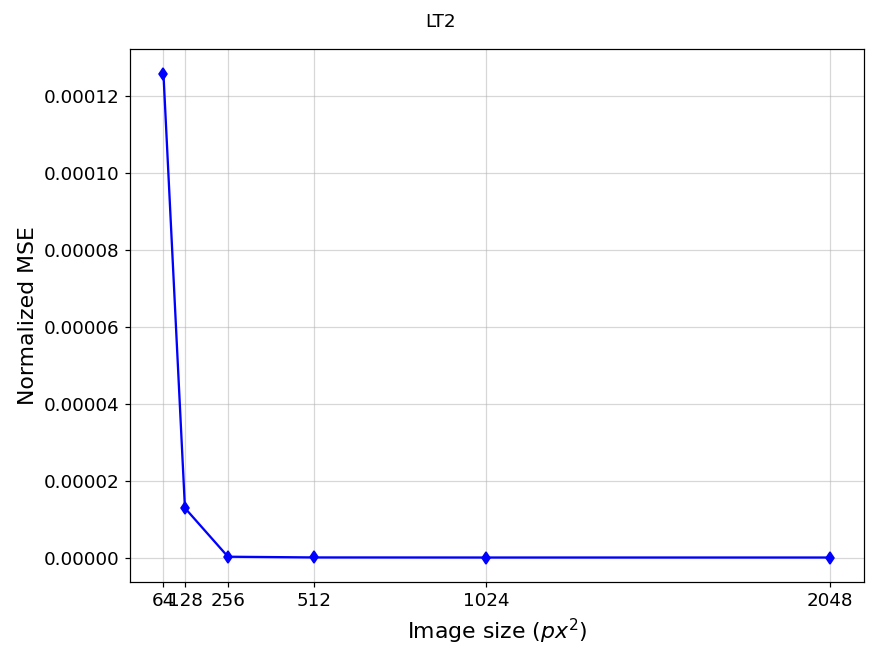

In [11]:
fig_format = 'pdf'

plt.figure(figsize= (8, 6))
plt.plot(df_mse_f2_lt2['image_size'], df_mse_f2_lt2['mse_f2'], 'b', marker = 'd')

plt.xlabel('Image size ($px^2$)', fontsize = 'x-large')
plt.ylabel('Normalized MSE', fontsize = 'x-large')
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'large')
plt.xticks(image_sizes_lt2)

plt.suptitle('LT2')
plt.tight_layout()
# plt.savefig(os.path.join(path_results, 'REV analysis_XCT', f'Normalized_MSE_512_n50.{fig_format}'), dpi = 1500)

plt.show()

In [15]:
df_mse_f2_lt1['mse_f2'][:-1]

0    3.906114e-05
1    1.853746e-06
2    9.441089e-08
3    3.121093e-09
4    4.057177e-10
5    1.098468e-10
Name: mse_f2, dtype: float64

<IPython.core.display.Javascript object>


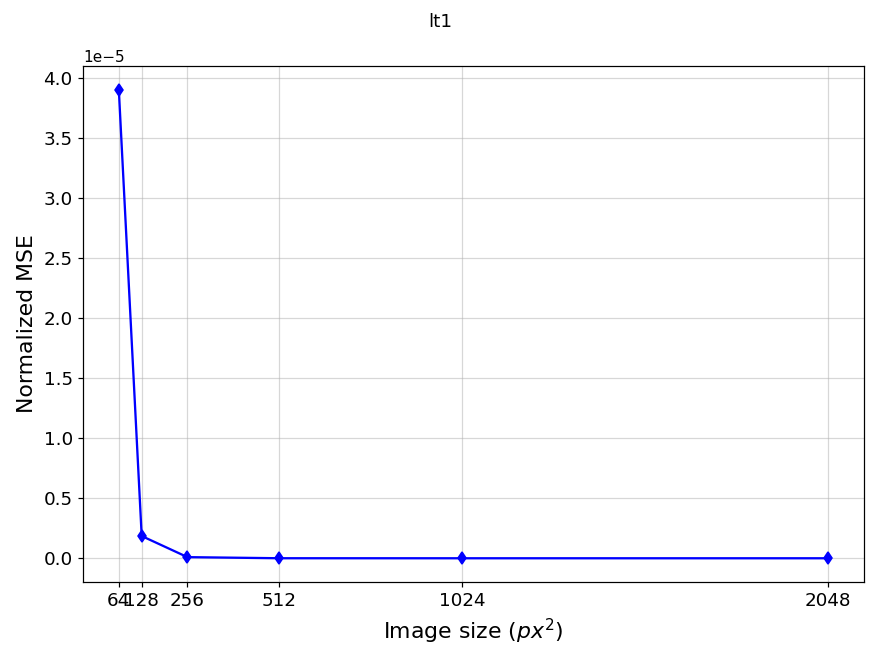

In [17]:
fig_format = 'pdf'

plt.figure(figsize= (8, 6))
plt.plot(df_mse_f2_lt1['image_size'][:-1], df_mse_f2_lt1['mse_f2'][:-1], 'b', marker = 'd')

plt.xlabel('Image size ($px^2$)', fontsize = 'x-large')
plt.ylabel('Normalized MSE', fontsize = 'x-large')
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'large')
plt.xticks(image_sizes_lt1[:-1])

plt.suptitle('lt1')
plt.tight_layout()
# plt.savefig(os.path.join(path_results, 'REV analysis_XCT', f'Normalized_MSE_512_n50.{fig_format}'), dpi = 1500)

plt.show()

In [45]:
2560/5

512.0